In [1]:
import tellurium as te
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import cobra
import os
os.getcwd()

from src.no_BayesianInference import BMCA, util

Generating data for running through the pipeline.

Running BMCA on BioModel 64

In [2]:
# load the Teusink model
Teusink_ant = 'data/interim/Antimony/BIOMD0000000064_e.ant'
data_file = 'data/interim/generated_data/BIOMD0000000064_e_0.csv'
data = pd.read_csv(data_file)

Comparing flux values, original and perturbed

In [4]:
_ = data.transpose().sort_index()
# _.rename({0: "unperturbed ss", 1: "EtOH -50%"}, axis=1, inplace=True)
_.loc['v_':'v_z']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
v_vADH,129.215909,126.074232,131.301487,129.175587,129.247051,130.624826,127.775393,130.313187,128.103523,129.184641,129.239383,129.209453,129.220942,128.353801,129.991105,129.190077,129.237081,129.194725,129.233139,129.154919,129.260850,129.185544,129.239248,129.190999,129.227699,130.431801,128.075222,113.207883,144.801531,128.810086,129.552723,131.153060,127.328554,130.331846,127.912646,129.215909,129.215909,129.215909,129.215909,129.215909,129.215909,129.215909,129.215909,128.768847,129.583231,130.334496,128.162364,129.117064,129.313707,129.197643,129.231392
v_vALD,77.349527,75.631215,78.491249,77.327463,77.366568,78.130239,76.553521,77.955666,76.736059,77.332417,77.362372,77.345994,77.352281,77.223640,77.458585,77.345827,77.352556,77.346493,77.351993,77.340784,77.355954,77.345177,77.352866,77.345959,77.351214,77.508743,77.193025,68.598840,85.931217,77.294658,77.394400,77.598212,77.087700,78.050919,76.591666,77.349527,77.349527,77.349527,77.349527,77.349527,77.349527,77.349527,77.349527,77.104912,77.550541,77.496281,77.205232,77.336306,77.362556,77.339532,77.357999
v_vATP,84.532764,81.686034,86.420476,84.496249,84.560966,86.989173,82.043744,86.235042,82.814929,84.504448,84.554022,84.526918,84.537322,83.060322,85.865039,84.488501,84.569049,84.496464,84.562294,84.428270,84.609791,84.480734,84.572763,84.490080,84.552969,86.646117,82.564395,70.018086,98.540628,83.830855,85.116646,87.909697,81.281710,85.361854,83.441960,84.532764,84.532764,84.532764,84.532764,84.532764,84.532764,84.532764,84.532764,84.127871,84.865379,86.476431,82.714263,84.361517,84.702302,84.516223,84.546785
v_vENO,136.496807,133.270860,138.638919,136.455398,136.528790,137.949298,135.013006,137.626943,135.351693,136.464696,136.520915,136.490178,136.501976,135.809081,137.112838,136.476242,136.513662,136.479942,136.510524,136.448247,136.532581,136.472632,136.515386,136.476975,136.506193,137.456283,135.592602,120.062110,152.533217,136.175580,136.763031,138.022593,134.999081,137.694701,135.132842,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.037698,136.874045,137.379658,135.661821,136.418649,136.574109,136.478049,136.512708
v_vG3PDH,18.202246,17.991570,18.343579,18.199527,18.204347,18.311181,18.094035,18.284389,18.120425,18.200138,18.203829,18.201811,18.202586,18.638199,17.804333,18.215412,18.191451,18.213043,18.193461,18.233320,18.179327,18.217721,18.190346,18.214942,18.196236,17.561203,18.793448,17.135569,19.329216,18.413736,18.025770,17.173831,19.176318,18.407137,18.050490,18.202246,18.202246,18.202246,18.202246,18.202246,18.202246,18.202246,18.202246,18.172126,18.227037,17.612904,18.748643,18.253962,18.151004,18.201015,18.203290
v_vGAPDH,136.496807,133.270860,138.638919,136.455398,136.528790,137.949298,135.013006,137.626943,135.351693,136.464696,136.520915,136.490178,136.501976,135.809081,137.112838,136.476242,136.513662,136.479942,136.510524,136.448247,136.532581,136.472632,136.515386,136.476975,136.506193,137.456283,135.592602,120.062110,152.533217,136.175580,136.763031,138.022593,134.999081,137.694701,135.132842,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.037698,136.874045,137.379658,135.661821,136.418649,136.574109,136.478049,136.512708
v_vGLK,88.149527,86.431215,89.291249,88.127463,88.166568,88.330239,87.953521,88.275666,88.016059,88.132417,88.162372,88.145994,88.152281,88.023640,88.258585,88.145827,88.152556,88.146493,88.151993,88.140784,88.155954,88.145177,88.152866,88.145959,88.151214,88.308743,87.993025,79.398840,96.731217,88.094658,88.194400,88.398212,87.887700,88.850919,87.391666,88.149527,88.149527,88.149527,88.149527,88.149527,88.149527,88.149527,88.149527,87.904912,88.350541,88.296281,88.005232,88.136306,88.162556,88.139532,88.157999
v_vGLT,88.149527,86.431215,89.291249,88.127463,88.166568,88.330239,87.953521,88.

Calculating the steady state concentrations of the Teusink model when EtOH concentration is halved. 

Predicting the steady state concentration values 

In [ ]:
r = te.loada(Teusink_ant)
BIOMD64 = BMCA.BMCA(Teusink_ant, data_file, desired_product='ETOH')
chi = BIOMD64.calculate_Smallbone_ss(BIOMD64.Ex, BIOMD64.Ey)
print(np.exp(chi.to_numpy()))

In [8]:
x_ss = np.exp(chi_star.to_numpy())
a = s.getIndependentFloatingSpeciesIds()
b = s.getFloatingSpeciesIds()
squiggle_idx = [b.index(i) for i in a if i in b]
squiggle_idx.sort()
estimated_ss = pd.DataFrame(data=x_ss, index=[b[i] for i in squiggle_idx], columns=['estimated'])

In [9]:
comparison = pd.concat([true_ss_values, estimated_ss], axis = 1)
comparison['error (%)'] = (comparison['estimated'])/comparison['true']
comparison.sort_index()

,true,estimated,error (%)
ACE,0.170114,0.189530,1.114133
BPG,0.000330,0.015044,45.647210
F16P,0.601908,0.008905,0.014795
F6P,0.112813,0.037363,0.331192
G6P,1.033246,0.037087,0.035894
GLCi,0.098759,0.395924,4.009007
NAD,1.545560,19.125750,12.374643
NADH,0.044440,NaN,NaN
P,6.308882,0.236591,0.037501
P2G,0.044844,0.055296,1.233077


Plotting relative changes in EtOH by relative changes in steady state intracelluar metabolite concentrations (Figure 3 in Smallbone et al. )

In [36]:
EtOH_scale = np.logspace(-1, 1, num=22)[:-2]
EtOH_scale

array([0.1       , 0.12451971, 0.15505158, 0.19306977, 0.24040992,
       0.29935773, 0.37275937, 0.46415888, 0.57796929, 0.71968567,
       0.8961505 , 1.11588399, 1.38949549, 1.73019574, 2.15443469,
       2.6826958 , 3.34048498, 4.15956216, 5.17947468, 6.44946677])

In [47]:
def calculate_relative_change(metabolite): 
    metabolite_scale = []

    for change in EtOH_scale: 
        s.resetAll()
        s.ETOH =(change * s.ETOH)
        # print(s.ETOH)
        s.steadyState()
        
        #s.simulate(0,50)
        #s.plot(title=change)
        
        metabolite_scale.append(s.getValue(metabolite))

    # calculate the relative change in BPG
    s.resetAll()
    s.steadyState()
    met_ss = s.getValue(metabolite)
    met_scale = np.array(metabolite_scale) / met_ss

    return met_scale

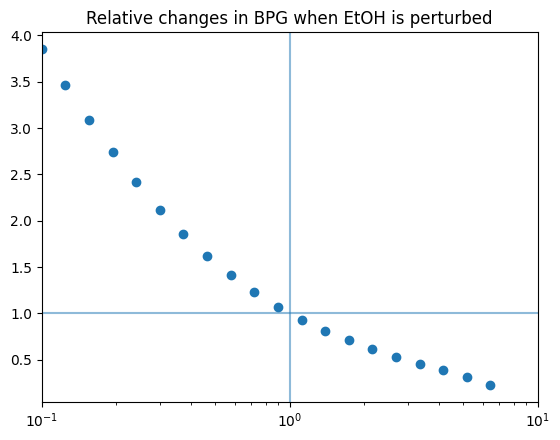

In [140]:
plt.scatter(EtOH_scale, calculate_relative_change('BPG'))
plt.xscale('log', base=10)
plt.xlim(0.1, 10)
plt.title('Relative changes in BPG when EtOH is perturbed')
plt.axvline(1, alpha=0.5)
plt.axhline(1, alpha=0.5)

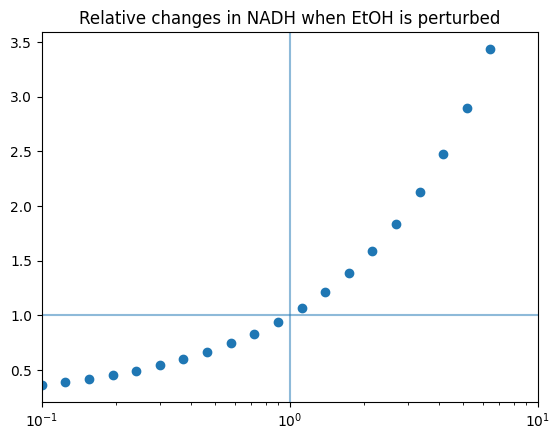

In [141]:
plt.scatter(EtOH_scale, calculate_relative_change('NADH'))
plt.xscale('log', base=10)
plt.xlim(0.1, 10)
plt.title('Relative changes in NADH when EtOH is perturbed')
plt.axvline(1, alpha=0.5)
plt.axhline(1, alpha=0.5)

Plotting relative changes in EtOH by relative changes in steady state fluxes *when fully parameterized*

In [3]:
ETOH_data_file = 'data/interim/generated_data/EtOHcompilation.csv'
ETOH_data = pd.read_csv(ETOH_data_file)

Teusink_ant = 'data/interim/Antimony/BIOMD0000000064_e.ant'
r = te.loada(Teusink_ant)
BIOMD64 = BMCA.BMCA(Teusink_ant, ETOH_data_file)
r.steadyState()
Ex = r.getUnscaledElasticityMatrix()
a = r.getBoundarySpeciesIds()
b = r.getReactionIds()
c=[]
for i in b: 
    for ii in a: 
        c.append(r.getUnscaledParameterElasticity(i, ii) * r[ii]/r[i])
Ey = np.array(c).reshape((len(b),len(a)))

In [4]:
## bdsp_scale = np.logspace(-2, 1, num=22)[:-7]
## bdsp_scale = bdsp_scale * 100

a = ETOH_data['ETOH']/50
a.drop(a.index[0],inplace=True)

EtOH_perturbed_fluxes = np.diag(BIOMD64.v_star)@(np.ones(BIOMD64.N.shape[1]).reshape((-1,1)) + Ex@np.log(BIOMD64.xn).T + Ey@np.log(BIOMD64.yn).T)

EtOH_perturbed_fluxes_df = pd.DataFrame(EtOH_perturbed_fluxes.values, index=r.getReactionIds(), columns=a.round(2).values) 
EtOH_perturbed_fluxes_df

,0.28,0.48,0.63,0.73,0.81,0.86,0.90,0.93,0.95,0.96,0.97,0.98,0.99,0.99,1.00,1.01,1.01,1.02,1.03,1.04,1.05,1.07,1.10,1.14,1.19,1.27,1.37,1.52,1.72,2.00
vGLK,-6.954164e+03,-4.643389e+03,-3.183930e+03,-2.208053e+03,-1.537029e+03,-1.068260e+03,-7.375859e+02,-5.028580e+02,-3.355407e+02,-2.159342e+02,-1.302653e+02,-6.881996e+01,-2.470550e+01,6.988099e+00,88.149527,1.690138e+02,2.004305e+02,2.440102e+02,3.044240e+02,3.880996e+02,5.038565e+02,6.637347e+02,8.840730e+02,1.186869e+03,1.601445e+03,2.166437e+03,2.932110e+03,3.963145e+03,5.342388e+03,7.177124e+03
vPGI,-1.848798e+04,-1.128821e+04,-7.368629e+03,-4.970149e+03,-3.413354e+03,-2.367366e+03,-1.649104e+03,-1.148756e+03,-7.968081e+02,-5.475802e+02,-3.702647e+02,-2.436958e+02,-1.531384e+02,-8.823884e+01,77.349527,2.414668e+02,3.049968e+02,3.929100e+02,5.143730e+02,6.818263e+02,9.120011e+02,1.227116e+03,1.656168e+03,2.236108e+03,3.012487e+03,4.038960e+03,5.374866e+03,7.080294e+03,9.208954e+03,1.180111e+04
vGLYCO,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
vTreha,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00
vPFK,2.698347e+04,1.648893e+04,1.080293e+04,7.336316e+03,5.091976e+03,3.586717e+03,2.554366e+03,1.835852e+03,1.330756e+03,9.732366e+02,7.189561e+02,5.374899e+02,4.076756e+02,3.146526e+02,77.349527,-1.577873e+02,-2.487936e+02,-3.747141e+02,-5.486617e+02,-7.884196e+02,-1.117882e+03,-1.568737e+03,-2.182260e+03,-3.010898e+03,-4.119039e+03,-5.582056e+03,-7.482487e+03,-9.902547e+03,-1.291349e+04,-1.656521e+04
vALD,8.610233e+02,5.271401e+02,3.670865e+02,2.727912e+02,2.123581e+02,1.719149e+02,1.441646e+02,1.248265e+02,1.112146e+02,1.015688e+02,9.470207e+01,8.979821e+01,8.628831e+01,8.377216e+01,77.349527,7.097971e+01,6.851272e+01,6.509774e+01,6.037723e+01,5.386468e+01,4.490349e+01,3.261628e+01,1.584690e+01,-6.901967e+00,-3.752861e+01,-7.838181e+01,-1.323015e+02,-2.026772e+02,-2.936148e+02,-4.104348e+02
vGAPDH,-3.599479e+06,-2.093578e+06,-1.343934e+06,-9.018560e+05,-6.201464e+05,-4.328110e+05,-3.049503e+05,-2.162161e+05,-1.539638e+05,-1.099635e+05,-7.869142e+04,-5.637800e+04,-4.043341e+04,-2.900425e+04,136.496807,2.899217e+04,4.016511e+04,5.559879e+04,7.692342e+04,1.063133e+05,1.466618e+05,2.018539e+05,2.768750e+05,3.780931e+05,5.133212e+05,6.916841e+05,9.233122e+05,1.218643e+06,1.587500e+06,2.038433e+06
vPGK,1.271676e+08,7.398888e+07,4.750463e+07,3.188269e+07,2.192635e+07,1.530483e+07,1.078521e+07,7.648518e+06,5.447870e+06,3.892407e+06,2.786888e+06,1.998066e+06,1.434388e+06,1.030340e+06,136.496807,-1.020000e+06,-1.414999e+06,-1.960636e+06,-2.714542e+06,-3.753592e+06,-5.180096e+06,-7.131417e+06,-9.783860e+06,-1.336264e+07,-1.814410e+07,-2.445109e+07,-3.264209e+07,-4.308663e+07,-5.613261e+07,-7.208290e+07
vPGM,-2.971783e+05,-1.671669e+05,-1.057052e+05,-7.033292e+04,-4.809554e+04,-3.342721e+04,-2.346819e+04,-1.658101e+04,-1.175989e+04,-8.357082e+03,-5.941592e+03,-4.220126e+03,-2.989823e+03,-2.108791e+03,136.496807,2.358216e+03,3.217295e+03,4.405217e+03,6.044879e+03,8.302285e+03,1.139960e+04,1.562964e+04,2.137089e+04,2.909988e+04,3.939539e+04,5.292848e+04,7.043160e+04,9.264860e+04,1.202804e+05,1.539671e+05
vENO,7.164282e+04,3.999739e+04,2.529438e+04,1.687747e+04,1.159469e+04,8.111268e+03,5.746002e+03,4.109943e+03,2.964415e+03,2.155729e+03,1.581588e+03,1.172361e+03,8.798656e+02,6.703896e+02,136.496807,-3.918787e+02,-5.962101e

In [20]:
rel_EtOH_perturbed_fluxes_df = EtOH_perturbed_fluxes_df.div(EtOH_perturbed_fluxes_df[1.00], axis=0)
rel_EtOH_perturbed_fluxes_df

,0.28,0.48,0.63,0.73,0.81,0.86,0.90,0.93,0.95,0.96,0.97,0.98,0.99,0.99,1.00,1.01,1.01,1.02,1.03,1.04,1.05,1.07,1.10,1.14,1.19,1.27,1.37,1.52,1.72,2.00
vGLK,-78.890548,-52.676279,-36.119653,-25.048951,-17.436615,-12.118728,-8.367440,-5.704603,-3.806495,-2.449635,-1.477777,-0.780718,-0.280268,0.079276,1.0,1.917354,2.273755,2.768139,3.453495,4.402741,5.715930,7.529645,10.029242,13.464265,18.167374,24.576842,33.262918,44.959349,60.605974,81.419877
vPGI,-239.018620,-145.937695,-95.264050,-64.255718,-44.128953,-30.606078,-21.320150,-14.851499,-10.301396,-7.079296,-4.786904,-3.150579,-1.979823,-1.140781,1.0,3.121761,3.943099,5.079669,6.649983,8.814873,11.790649,15.864552,21.411484,28.909137,38.946415,52.216997,69.488023,91.536355,119.056373,152.568572
vGLYCO,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vTreha,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vPFK,348.851126,213.174327,139.663844,94.846291,65.830733,46.370257,33.023686,23.734495,17.204452,12.582321,9.294899,6.948845,5.270563,4.067932,1.0,-2.039926,-3.216485,-4.844426,-7.093278,-10.192947,-14.452349,-20.281144,-28.212970,-38.925868,-53.252285,-72.166650,-96.736039,-128.023365,-166.949869,-214.160521
vALD,11.131592,6.815040,4.745814,3.526734,2.745435,2.222572,1.863807,1.613798,1.437818,1.313114,1.224339,1.160941,1.115563,1.083034,1.0,0.917649,0.885755,0.841605,0.780577,0.696380,0.580527,0.421674,0.204874,-0.089231,-0.485182,-1.013346,-1.710438,-2.620277,-3.795948,-5.306236
vGAPDH,-26370.429887,-15337.926318,-9845.902010,-6607.158165,-4543.303393,-3170.850628,-2234.120070,-1584.038121,-1127.966108,-805.611956,-576.507432,-413.035289,-296.222389,-212.490291,1.0,212.401811,294.256778,407.326659,563.554731,778.870238,1074.470736,1478.817842,2028.435735,2769.977956,3760.683196,5067.401603,6764.350137,8927.996380,11630.307279,14933.924941
vPGK,931652.650860,542055.740829,348027.374883,233578.260953,160636.363473,112125.911076,79014.409088,56034.411097,39912.069559,28516.466073,20417.241127,14638.189466,10508.579372,7548.451412,1.0,-7472.704001,-10366.532398,-14363.968668,-19887.220318,-27499.486331,-37950.310286,-52246.034861,-71678.308405,-97897.076040,-132926.933018,-179133.023589,-239141.813276,-315660.378018,-411237.552485,-528092.225117
vPGM,-2177.181177,-1224.694557,-774.415334,-515.271551,-352.356527,-244.893707,-171.932146,-121.475478,-86.155060,-61.225476,-43.529162,-30.917401,-21.903978,-15.449378,1.0,17.276710,23.570481,32.273410,44.285866,60.824023,83.515482,114.505507,156.566943,213.190934,288.617698,387.763492,515.994503,678.760169,881.195514,1127.990171
vENO,524.868098,293.028024,185.311178,123.647375,84.944762,59.424602,42.096240,30.110175,21.717836,15.793256,11.586993,8.588928,6.446052,4.911394,1.0,-2.870974,-4.367942,-6.438099,-9.295827,-13.230822,-18.631189,-26.009110,-36.027978,-49.526095,-67.527693,-91.233391,-121.980009,-161.177867,-210.255355,-270.688268


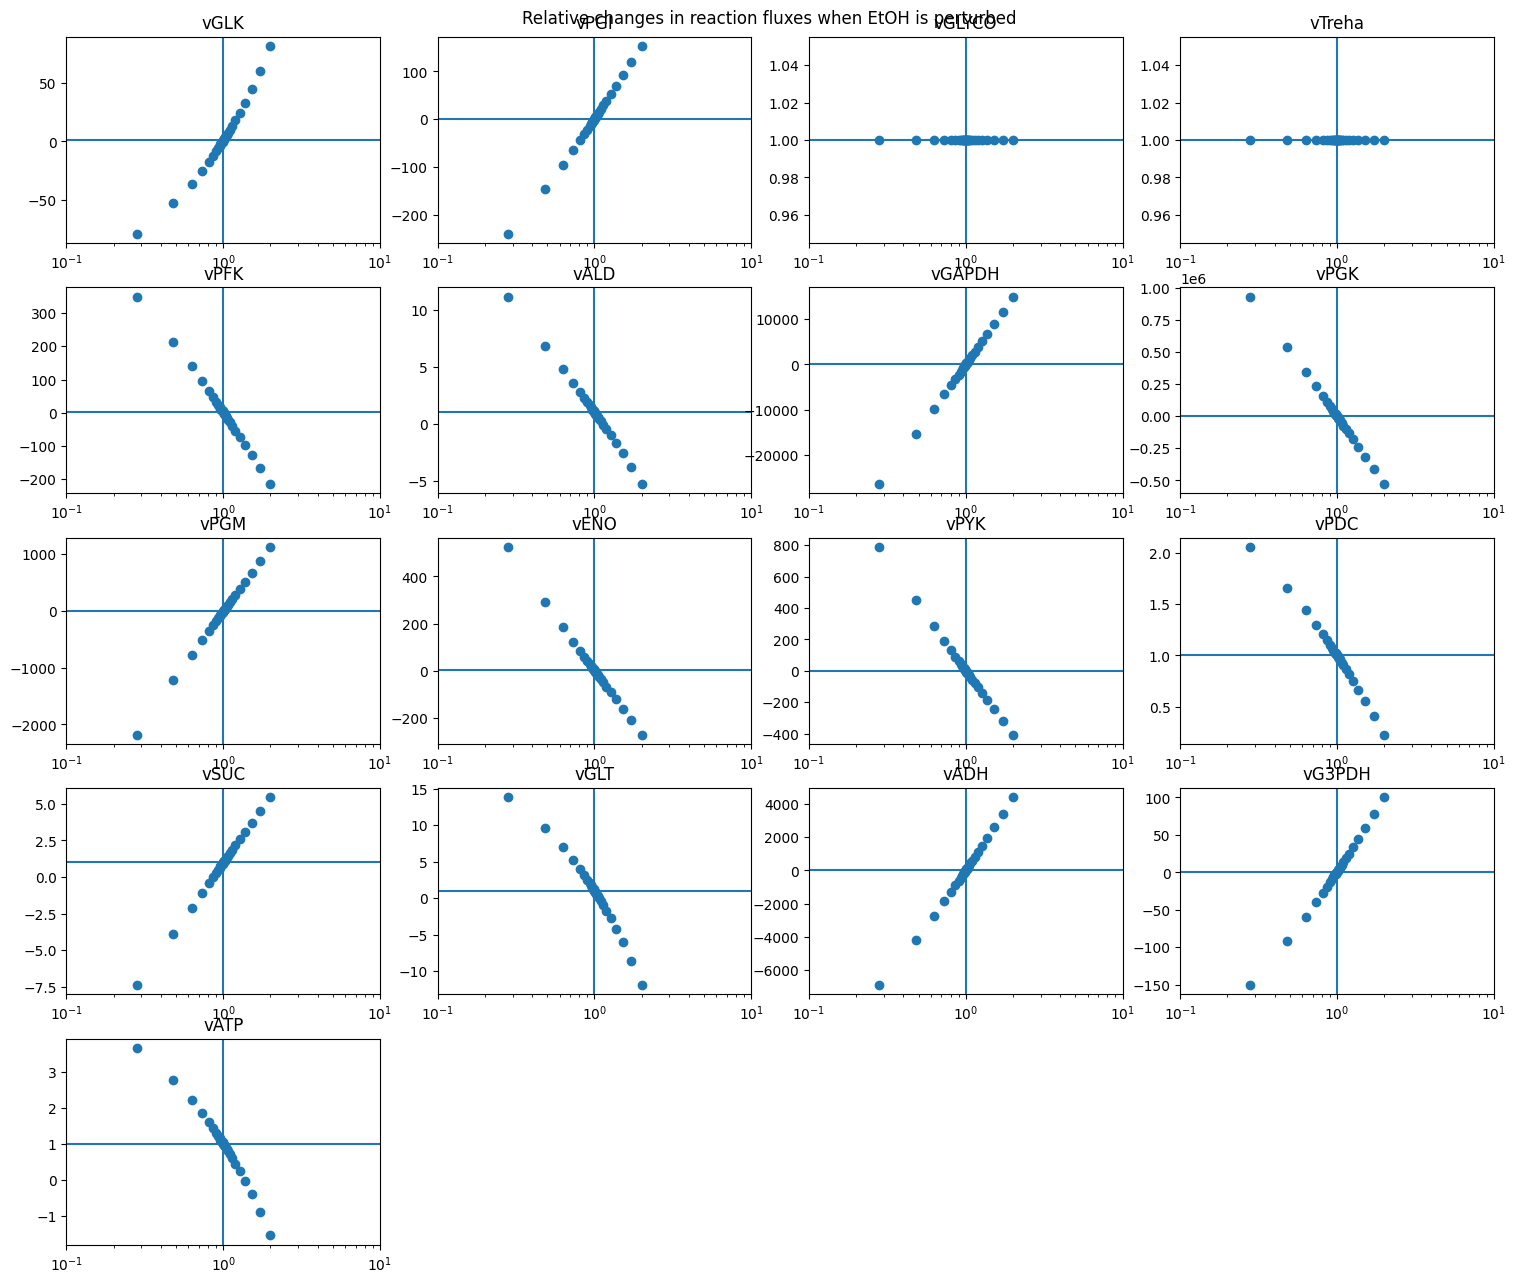

In [40]:
fig, axs = plt.subplots(5,4, figsize=(15, 13)) 
idx_starter = -1

fig.suptitle('Relative changes in reaction fluxes when EtOH is perturbed')
fig.tight_layout()

## NEED TO PLOT THE REAL VALUES HERE TOO

for i, rxn in enumerate(r.getReactionIds()):
  if i%4==0:
    idx_starter += 1
  
  axs[idx_starter, i%4].scatter(rel_EtOH_perturbed_fluxes_df.columns, rel_EtOH_perturbed_fluxes_df.loc[rxn])
  axs[idx_starter, i%4].set_xscale('log', base=10)
  axs[idx_starter, i%4].set_xlim([0.1, 10])
  axs[idx_starter, i%4].set_title(rxn)
  axs[idx_starter, i%4].axvline(1)
  axs[idx_starter, i%4].axhline(1)

fig.delaxes(axs[4,1]) 
fig.delaxes(axs[4,2]) 
fig.delaxes(axs[4,3]) 



Plotting relative changes in GLY by relative changes in steady state fluxes *when fully parameterized*

In [41]:
GLY_data_file = 'data/interim/generated_data/GLYcompilation.csv'
GLY_data = pd.read_csv(GLY_data_file)

Teusink_ant = 'data/interim/Antimony/BIOMD0000000064_e.ant'
r = te.loada(Teusink_ant)
BIOMD64 = BMCA.BMCA(Teusink_ant, GLY_data_file)
r.steadyState()
Ex = r.getUnscaledElasticityMatrix()
a = r.getBoundarySpeciesIds()
b = r.getReactionIds()
c=[]
for i in b: 
    for ii in a: 
        c.append(r.getUnscaledParameterElasticity(i, ii) * r[ii]/r[i])
Ey = np.array(c).reshape((len(b),len(a)))

In [45]:
a = GLY_data['GLY']/0.15
a.drop(a.index[0],inplace=True)

GLY_perturbed_fluxes = np.diag(BIOMD64.v_star)@(np.ones(BIOMD64.N.shape[1]).reshape((-1,1)) + Ex@np.log(BIOMD64.xn).T + Ey@np.log(BIOMD64.yn).T)

GLY_perturbed_fluxes_df = pd.DataFrame(GLY_perturbed_fluxes.values, index=r.getReactionIds(), columns=a.round(2).values) 
GLY_perturbed_fluxes_df

,0.28,0.48,0.63,0.73,0.81,0.86,0.90,0.93,0.95,0.96,0.97,0.98,0.99,0.99,1.00,1.01,1.01,1.02,1.03,1.04,1.05,1.07,1.10,1.14,1.19,1.27,1.37,1.52,1.72,2.00
vGLK,6.401137e+02,4.800421e+02,3.674870e+02,2.878099e+02,2.311390e+02,1.906962e+02,161.765244,141.033966,126.160185,115.479759,107.805478,102.288638,98.321638,95.468442,88.149527,80.839865,77.995308,74.045333,68.561292,60.949734,50.390432,35.751292,15.472153,-1.258538e+01,-5.134199e+01,-1.047565e+02,-1.781428e+02,-2.785402e+02,-4.150942e+02,-5.993708e+02
vPGI,1.331738e+03,9.731515e+02,7.185016e+02,5.369647e+02,4.071977e+02,3.142576e+02,247.601867,199.750341,165.373992,140.665288,122.899304,110.122136,100.930698,94.318230,77.349527,60.393647,53.792747,44.623903,31.890204,14.208112,-10.338418,-44.402038,-91.649452,-1.571390e+02,-2.478269e+02,-3.732457e+02,-5.463841e+02,-7.848108e+02,-1.112041e+03,-1.559107e+03
vGLYCO,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
vTreha,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00
vPFK,-1.683790e+03,-1.180610e+03,-8.231446e+02,-5.682459e+02,-3.860045e+02,-2.554650e+02,-161.834514,-94.613625,-46.320093,-11.606976,13.352965,31.304316,44.218020,53.508445,77.349527,101.173084,110.447675,123.330472,141.222366,166.067551,200.558839,248.424566,314.819078,4.068542e+02,5.343131e+02,7.106063e+02,9.540169e+02,1.289291e+03,1.749583e+03,2.378700e+03
vALD,-8.712635e+00,1.576225e+01,3.320287e+01,4.566769e+01,5.459451e+01,6.099663e+01,65.592692,68.894566,71.267809,72.974285,74.201613,75.084463,75.719626,76.176608,77.349527,78.521815,78.978244,79.612311,80.493053,81.716261,83.414804,85.772774,89.045154,9.358428e+01,9.987643e+01,1.085908e+02,1.206453e+02,1.372929e+02,1.602334e+02,1.917557e+02
vGAPDH,1.967509e+05,1.405627e+05,1.006543e+05,7.219663e+04,5.185780e+04,3.727833e+04,26830.392924,19335.973740,13940.289203,10062.107589,7277.978866,5278.353488,3838.606459,2804.497824,136.496807,-2516.044565,-3562.635570,-4999.618685,-6993.915024,-9767.742338,-13612.115523,-18955.446928,-26361.856080,-3.663878e+04,-5.085825e+04,-7.053796e+04,-9.770018e+04,-1.351156e+05,-1.864792e+05,-2.566913e+05
vPGK,-6.873403e+06,-4.909083e+06,-3.513906e+06,-2.519040e+06,-1.808007e+06,-1.298317e+06,-933063.750621,-671064.844187,-482434.698766,-346855.646745,-249524.610446,-179619.582116,-129287.202944,-93135.812450,136.496807,92866.702433,129456.181368,179691.989646,249410.839583,346381.982172,480777.883760,667577.029304,926499.176033,1.285773e+06,1.782875e+06,2.470862e+06,3.420431e+06,4.728441e+06,6.524066e+06,8.978614e+06
vPGM,1.506589e+04,1.080737e+04,7.778811e+03,5.617483e+03,4.071290e+03,2.963288e+03,2168.294283,1597.422059,1187.199762,892.319555,680.273007,527.735397,418.015081,339.089697,136.496807,-65.954124,-144.782203,-254.268106,-406.342065,-617.511947,-910.696857,-1317.626076,-1882.164095,-2.664927e+03,-3.749315e+03,-5.249910e+03,-7.323167e+03,-1.018156e+04,-1.411106e+04,-1.949217e+04
vENO,-3.415291e+03,-2.401678e+03,-1.681073e+03,-1.166930e+03,-7.991745e+02,-5.356698e+02,-346.617563,-210.870463,-113.325291,-43.211744,7.206015,43.476399,69.562740,88.326091,136.496807,184.630275,203.372237,229.403531,265.559309,315.764889,385.467274,482.208580,616.415599,8.024937e+02,1.060255e+03,1.416923e+03,1.909648e+03,2.588867e+03,3.522439e+03,4.800619e+03


In [46]:
rel_GLY_perturbed_fluxes_df = GLY_perturbed_fluxes_df.div(GLY_perturbed_fluxes_df[1.00], axis=0)
rel_GLY_perturbed_fluxes_df

,0.28,0.48,0.63,0.73,0.81,0.86,0.90,0.93,0.95,0.96,0.97,0.98,0.99,0.99,1.00,1.01,1.01,1.02,1.03,1.04,1.05,1.07,1.10,1.14,1.19,1.27,1.37,1.52,1.72,2.00
vGLK,7.261680,5.445771,4.168905,3.265020,2.622124,2.163326,1.835123,1.599940,1.431207,1.310044,1.222984,1.160399,1.115396,1.083028,1.0,0.917077,0.884807,0.839997,0.777784,0.691436,0.571647,0.405576,0.175522,-0.142773,-0.582442,-1.188395,-2.020916,-3.159861,-4.708979,-6.799478
vPGI,17.217150,12.581221,9.289024,6.942056,5.264385,4.062826,3.201078,2.582438,2.138009,1.818567,1.588882,1.423695,1.304865,1.219377,1.0,0.780789,0.695450,0.576912,0.412287,0.183687,-0.133658,-0.574044,-1.184874,-2.031544,-3.203988,-4.825442,-7.063832,-10.146291,-14.376834,-20.156651
vGLYCO,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vTreha,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vPFK,-21.768592,-15.263308,-10.641883,-7.346469,-4.990393,-3.302735,-2.092250,-1.223196,-0.598841,-0.150059,0.172631,0.404712,0.571665,0.691775,1.0,1.307999,1.427904,1.594457,1.825769,2.146976,2.592890,3.211714,4.070084,5.259945,6.907774,9.186951,12.333843,16.668376,22.619179,30.752609
vALD,-0.112640,0.203779,0.429258,0.590407,0.705816,0.788584,0.848004,0.890692,0.921374,0.943435,0.959303,0.970717,0.978928,0.984836,1.0,1.015156,1.021057,1.029254,1.040641,1.056455,1.078414,1.108898,1.151205,1.209888,1.291235,1.403898,1.559742,1.774967,2.071550,2.479080
vGAPDH,1441.432319,1029.787283,737.411727,528.925389,379.919511,273.107727,196.564253,141.658799,102.129050,73.716798,53.319774,38.670161,28.122317,20.546252,1.0,-18.432992,-26.100505,-36.628100,-51.238671,-71.560226,-99.724791,-138.870991,-193.131668,-268.422236,-372.596650,-516.773665,-715.768954,-989.880929,-1366.180019,-1880.566384
vPGK,-50355.776142,-35964.816095,-25743.505915,-18454.934613,-13245.780728,-9511.699641,-6835.791755,-4916.340953,-3534.402804,-2541.126444,-1828.061881,-1315.925153,-947.181150,-682.329603,1.0,680.358055,948.419116,1316.455623,1827.228375,2537.656292,3522.264681,4890.788598,6787.698509,9419.805142,13061.658099,18101.977093,25058.686799,34641.405149,47796.476069,65778.930393
vPGM,110.375403,79.176691,56.988962,41.154682,29.827001,21.709578,15.885311,11.702999,8.697638,6.537292,4.983802,3.866284,3.062453,2.484232,1.0,-0.483192,-1.060700,-1.862814,-2.976935,-4.524003,-6.671928,-9.653164,-13.789070,-19.523733,-27.468151,-38.461776,-53.650833,-74.591938,-103.380183,-142.803124
vENO,-25.021033,-17.595119,-12.315842,-8.549138,-5.854895,-3.924413,-2.539382,-1.544875,-0.830241,-0.316577,0.052793,0.318516,0.509629,0.647093,1.0,1.352634,1.489941,1.680651,1.945535,2.313350,2.824002,3.532746,4.515971,5.879212,7.767619,10.380631,13.990419,18.966502,25.806020,35.170189


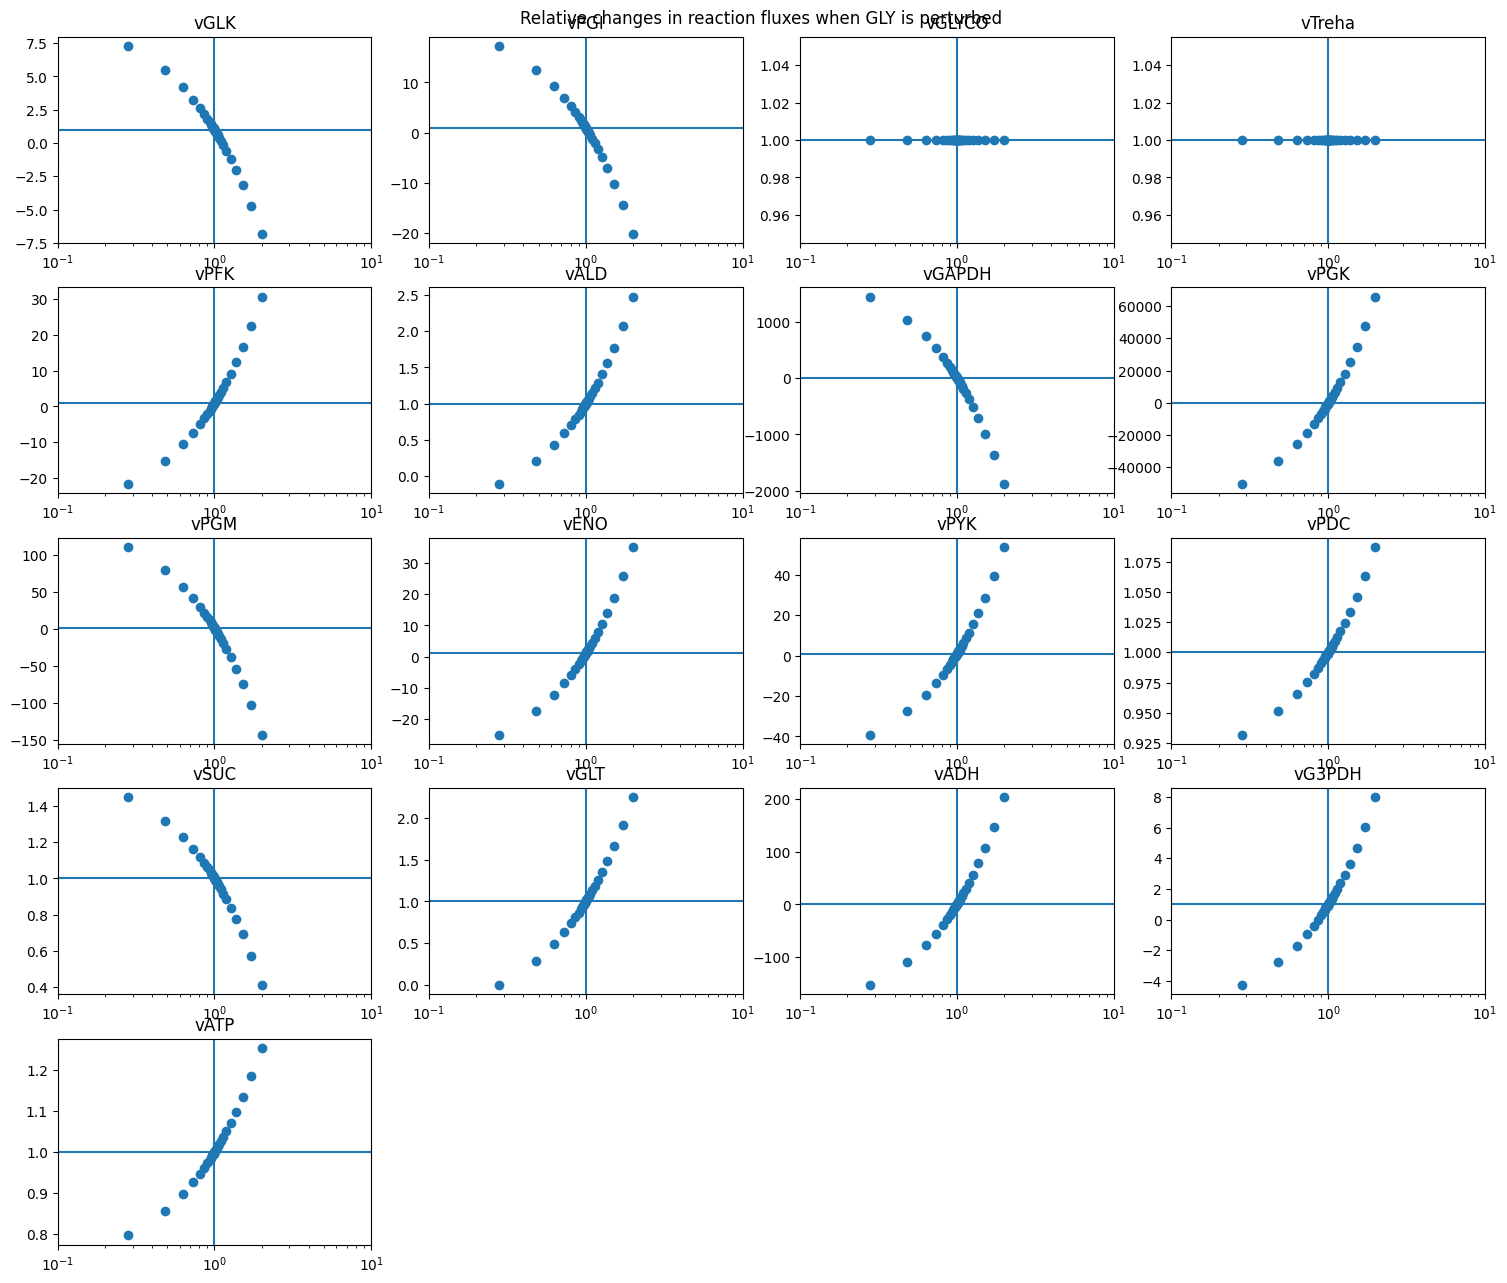

In [47]:
fig, axs = plt.subplots(5,4, figsize=(15, 13)) 
idx_starter = -1

fig.suptitle('Relative changes in reaction fluxes when GLY is perturbed')
fig.tight_layout()

## NEED TO PLOT THE REAL VALUES HERE TOO

for i, rxn in enumerate(r.getReactionIds()):
  if i%4==0:
    idx_starter += 1
  
  axs[idx_starter, i%4].scatter(rel_GLY_perturbed_fluxes_df.columns, rel_GLY_perturbed_fluxes_df.loc[rxn])
  axs[idx_starter, i%4].set_xscale('log', base=10)
  axs[idx_starter, i%4].set_xlim([0.1, 10])
  axs[idx_starter, i%4].set_title(rxn)
  axs[idx_starter, i%4].axvline(1)
  axs[idx_starter, i%4].axhline(1)

fig.delaxes(axs[4,1]) 
fig.delaxes(axs[4,2]) 
fig.delaxes(axs[4,3]) 

Plotting relative changes in GLCo by relative changes in steady state fluxes *when fully parameterized*

In [48]:
GLCo_data_file = 'data/interim/generated_data/GLCocompilation.csv'
GLCo_data = pd.read_csv(GLCo_data_file)

Teusink_ant = 'data/interim/Antimony/BIOMD0000000064_e.ant'
r = te.loada(Teusink_ant)
BIOMD64 = BMCA.BMCA(Teusink_ant, GLCo_data_file)
r.steadyState()
Ex = r.getUnscaledElasticityMatrix()
a = r.getBoundarySpeciesIds()
b = r.getReactionIds()
c=[]
for i in b: 
    for ii in a: 
        c.append(r.getUnscaledParameterElasticity(i, ii) * r[ii]/r[i])
Ey = np.array(c).reshape((len(b),len(a)))

In [49]:
a = GLCo_data['GLCo']/50
a.drop(a.index[0],inplace=True)

GLCo_perturbed_fluxes = np.diag(BIOMD64.v_star)@(np.ones(BIOMD64.N.shape[1]).reshape((-1,1)) + Ex@np.log(BIOMD64.xn).T + Ey@np.log(BIOMD64.yn).T)

GLCo_perturbed_fluxes_df = pd.DataFrame(GLCo_perturbed_fluxes.values, index=r.getReactionIds(), columns=a.round(2).values) 
GLCo_perturbed_fluxes_df

,0.28,0.48,0.63,0.73,0.81,0.86,0.90,0.93,0.95,0.96,0.97,0.98,0.99,0.99,1.00,1.01,1.01,1.02,1.03,1.04,1.05,1.07,1.10,1.14,1.19,1.27,1.37,1.52,1.72,2.00
vGLK,-2.879148e+02,-1.045443e+02,-2.537943e+01,1.599174e+01,4.026683e+01,5.552414e+01,6.553737e+01,7.229788e+01,7.695060e+01,8.019473e+01,82.477807,84.094761,85.245114,86.066465,88.149527,90.196728,90.984279,92.070529,93.562612,95.605126,9.838385e+01,1.021351e+02,1.071460e+02,1.137465e+02,1.222805e+02,1.330542e+02,1.462503e+02,1.618293e+02,1.794389e+02,1.983924e+02
vPGI,1.169462e+04,5.193306e+03,2.955631e+03,1.867628e+03,1.251126e+03,8.712540e+02,6.249888e+02,4.600430e+02,3.471353e+02,2.686939e+02,213.634634,174.708020,147.046947,127.319581,77.349527,28.333060,9.493469,-16.453461,-52.069145,-100.729804,-1.667951e+02,-2.557236e+02,-3.740558e+02,-5.291216e+02,-7.282986e+02,-9.776591e+02,-1.280019e+03,-1.632740e+03,-2.026122e+03,-2.443453e+03
vGLYCO,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
vTreha,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00,2.400000e+00
vPFK,-1.648623e+04,-7.243531e+03,-4.046450e+03,-2.489126e+03,-1.605881e+03,-1.061361e+03,-7.082405e+02,-4.716726e+02,-3.097151e+02,-1.971856e+02,-118.193807,-62.344316,-22.656537,5.648723,77.349527,147.685680,174.720490,211.955224,263.066539,332.901517,4.277202e+02,5.553631e+02,7.252285e+02,9.478564e+02,1.233866e+03,1.592021e+03,2.026419e+03,2.533339e+03,3.098908e+03,3.699150e+03
vALD,-1.358676e+03,-5.523103e+02,-2.766877e+02,-1.428355e+02,-6.701139e+01,-2.029316e+01,9.993803e+00,3.028020e+01,4.416684e+01,5.381459e+01,60.586673,65.374501,68.776779,71.203197,77.349527,83.378669,85.695977,88.887594,93.268527,99.254160,1.073808e+02,1.183203e+02,1.328774e+02,1.519548e+02,1.764613e+02,2.071464e+02,2.443605e+02,2.877844e+02,3.362309e+02,3.876492e+02
vGAPDH,1.687142e+06,7.531611e+05,4.261414e+05,2.658590e+05,1.746520e+05,1.182905e+05,8.170123e+04,5.716483e+04,4.035179e+04,2.865981e+04,20458.262446,14654.789444,10529.866270,7591.737062,136.496807,-7167.861137,-9983.744734,-13851.010535,-19168.380695,-26442.078871,-3.629702e+04,-4.959658e+04,-6.728314e+04,-9.047793e+04,-1.203159e+05,-1.577013e+05,-2.031275e+05,-2.562100e+05,-3.155650e+05,-3.786797e+05
vPGK,-5.925841e+07,-2.644988e+07,-1.496311e+07,-9.333206e+06,-6.129596e+06,-4.149929e+06,-2.864757e+06,-2.002934e+06,-1.412390e+06,-1.001720e+06,-713647.174572,-509805.353620,-364921.162632,-261721.887046,136.496807,256695.603988,355600.660533,491434.905187,678202.329845,933683.488596,1.279829e+06,1.746962e+06,2.368184e+06,3.182875e+06,4.230899e+06,5.544016e+06,7.139550e+06,9.003997e+06,1.108875e+07,1.330555e+07
vPGM,1.698432e+05,7.625691e+04,4.329266e+04,2.708698e+04,1.784776e+04,1.213349e+04,8.420082e+03,5.928889e+03,4.221783e+03,3.034867e+03,2201.316278,1611.782179,1192.750743,893.834080,136.496807,-606.695422,-892.426563,-1286.013029,-1826.410043,-2564.976064,-3.568171e+03,-4.919402e+03,-6.718970e+03,-9.079806e+03,-1.211672e+04,-1.592600e+04,-2.055581e+04,-2.597214e+04,-3.203282e+04,-3.848602e+04
vENO,-4.604922e+04,-2.048180e+04,-1.153612e+04,-7.148086e+03,-4.649035e+03,-3.104346e+03,-2.100899e+03,-1.427883e+03,-9.667675e+02,-6.461962e+02,-421.083148,-261.878575,-148.721548,-68.003384,136.496807,337.165499,414.313296,520.578508,666.477833,865.870070,1.136686e+03,1.501426e+03,1.987136e+03,2.624235e+03,3.443632e+03,4.471184e+03,5.719719e+03,7.179886e+03,8.813172e+03,1.055158e+04


In [50]:
rel_GLCo_perturbed_fluxes_df = GLCo_perturbed_fluxes_df.div(GLCo_perturbed_fluxes_df[1.00], axis=0)
rel_GLCo_perturbed_fluxes_df

,0.28,0.48,0.63,0.73,0.81,0.86,0.90,0.93,0.95,0.96,0.97,0.98,0.99,0.99,1.00,1.01,1.01,1.02,1.03,1.04,1.05,1.07,1.10,1.14,1.19,1.27,1.37,1.52,1.72,2.00
vGLK,-3.266209,-1.185988,-0.287913,0.181416,0.456801,0.629886,0.743480,0.820173,0.872955,0.909758,0.935658,0.954001,0.967051,0.976369,1.0,1.023224,1.032158,1.044481,1.061408,1.084579,1.116102,1.158657,1.215502,1.290382,1.387194,1.509414,1.659116,1.835850,2.035620,2.250635
vPGI,151.191888,67.140763,38.211371,24.145302,16.174963,11.263856,8.080060,5.947586,4.487879,3.473763,2.761938,2.258682,1.901071,1.646029,1.0,0.366299,0.122735,-0.212716,-0.673167,-1.302268,-2.156382,-3.306079,-4.835916,-6.840658,-9.415682,-12.639497,-16.548503,-21.108594,-26.194370,-31.589756
vGLYCO,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vTreha,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vPFK,-213.139333,-93.646743,-52.313831,-32.180239,-20.761360,-13.721627,-9.156365,-6.097937,-4.004099,-2.549279,-1.528048,-0.806008,-0.292911,0.073029,1.0,1.909329,2.258844,2.740227,3.401010,4.303860,5.529707,7.179916,9.375992,12.254198,15.951830,20.582164,26.198208,32.751835,40.063700,47.823828
vALD,-17.565410,-7.140449,-3.577109,-1.846624,-0.866345,-0.262357,0.129203,0.391472,0.571003,0.695733,0.783284,0.845183,0.889169,0.920538,1.0,1.077947,1.107906,1.149168,1.205806,1.283190,1.388255,1.529683,1.717883,1.964521,2.281349,2.678057,3.159173,3.720570,4.346903,5.011656
vGAPDH,12360.306503,5517.792885,3121.987700,1947.730626,1279.531965,866.617108,598.557773,418.799729,295.624426,209.966917,149.880886,107.363606,77.143682,55.618422,1.0,-52.513031,-73.142698,-101.474978,-140.430982,-193.719394,-265.918478,-363.353408,-492.928311,-662.857468,-881.455798,-1155.348064,-1488.148357,-1877.040153,-2311.885746,-2774.275265
vPGK,-434137.705371,-193776.546361,-109622.436430,-68376.736885,-44906.517438,-30403.122567,-20987.720690,-14673.855239,-10347.423239,-7338.777722,-5228.306714,-3734.925112,-2673.477641,-1917.421308,1.0,1880.597861,2605.193977,3600.339924,4968.631448,6840.332066,9376.256611,12798.554715,17349.737531,23318.313408,30996.323240,40616.454023,52305.620877,65964.891332,81238.167497,97478.828705
vPGM,1244.301842,558.671751,317.169740,198.444047,130.755898,88.892113,61.687027,43.436100,30.929536,22.233980,16.127236,11.808204,8.738305,6.548388,1.0,-4.444759,-6.538076,-9.421561,-13.380606,-18.791473,-26.141060,-36.040419,-49.224376,-66.520278,-88.769253,-116.676752,-150.595508,-190.276551,-234.678165,-281.955487
vENO,-337.364810,-150.053328,-84.515668,-52.368152,-34.059661,-22.742995,-15.391562,-10.460928,-7.082712,-4.734149,-3.084930,-1.918569,-1.089561,-0.498205,1.0,2.470135,3.035333,3.813851,4.882736,6.343519,8.327568,10.999716,14.558111,19.225616,25.228660,32.756696,41.903683,52.601127,64.566869,77.302770


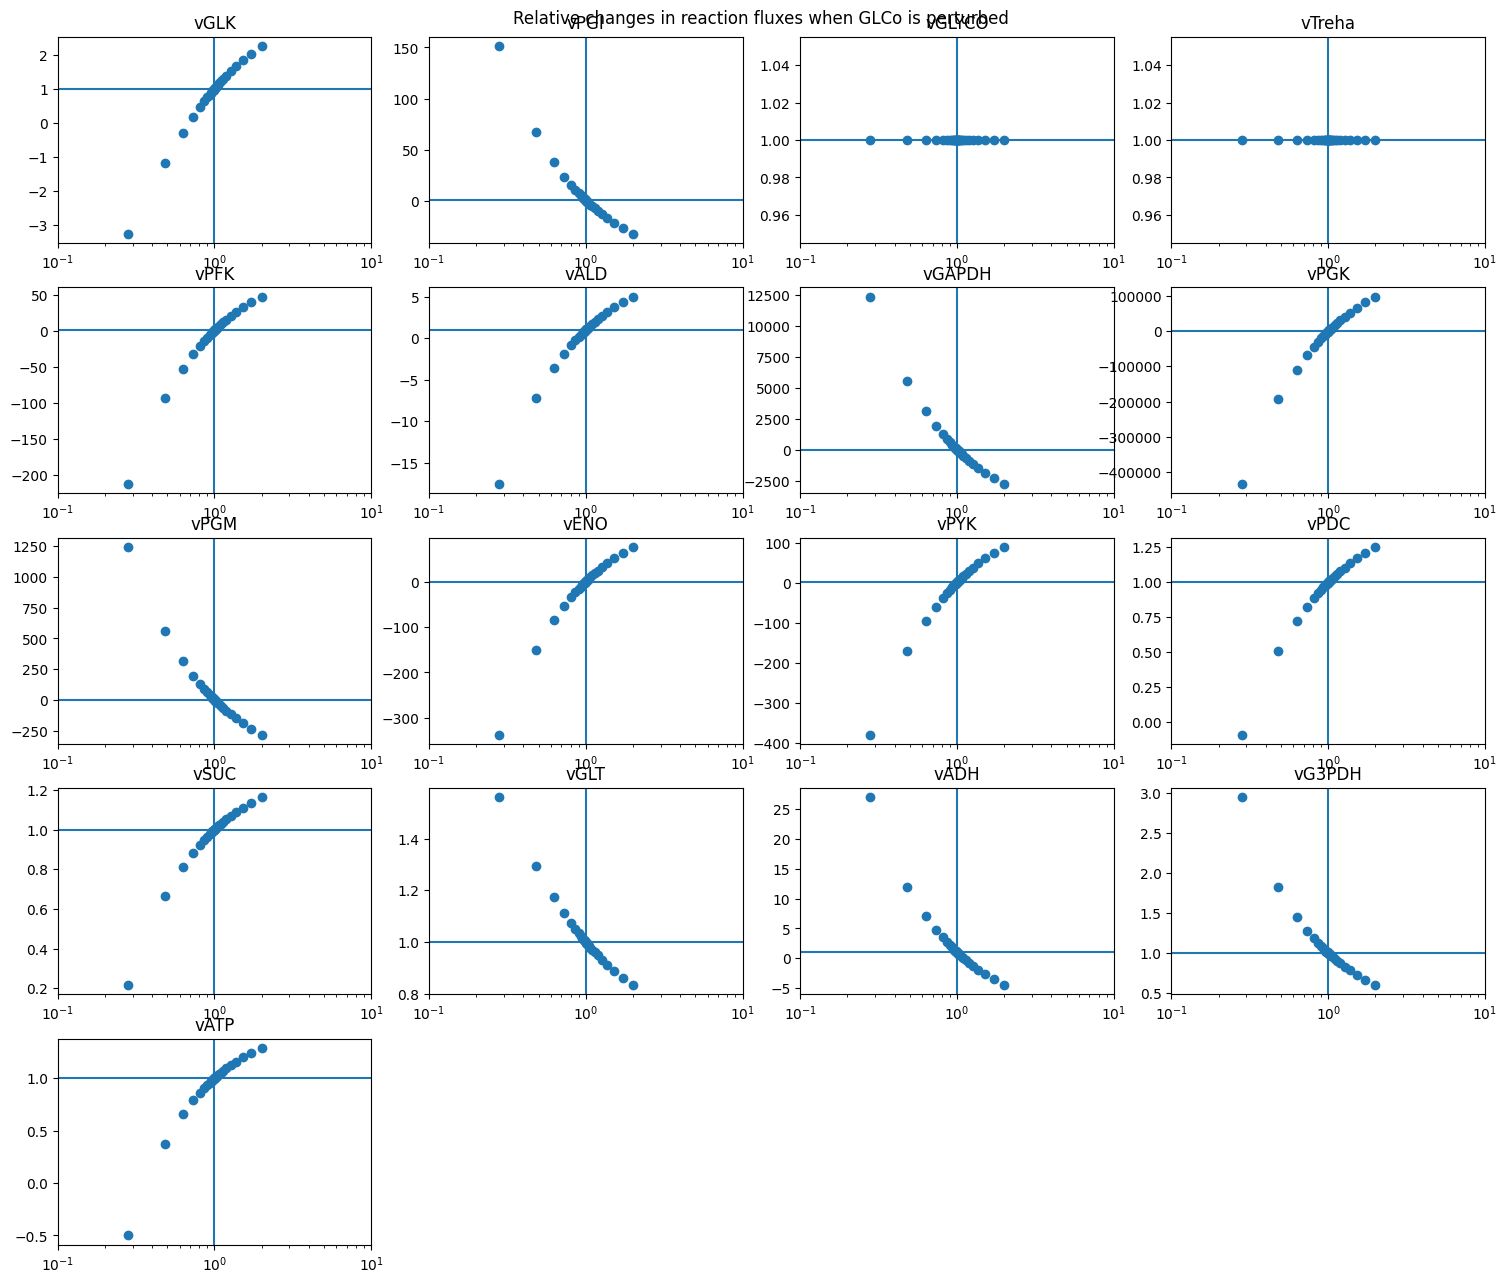

In [51]:
fig, axs = plt.subplots(5,4, figsize=(15, 13)) 
idx_starter = -1

fig.suptitle('Relative changes in reaction fluxes when GLCo is perturbed')
fig.tight_layout()

## NEED TO PLOT THE REAL VALUES HERE TOO

for i, rxn in enumerate(r.getReactionIds()):
  if i%4==0:
    idx_starter += 1
  
  axs[idx_starter, i%4].scatter(rel_GLCo_perturbed_fluxes_df.columns, rel_GLCo_perturbed_fluxes_df.loc[rxn])
  axs[idx_starter, i%4].set_xscale('log', base=10)
  axs[idx_starter, i%4].set_xlim([0.1, 10])
  axs[idx_starter, i%4].set_title(rxn)
  axs[idx_starter, i%4].axvline(1)
  axs[idx_starter, i%4].axhline(1)

fig.delaxes(axs[4,1]) 
fig.delaxes(axs[4,2]) 
fig.delaxes(axs[4,3]) 